In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
m = 100
x1 = 8 * np.random.rand(m, 1)
x2 = 7 * np.random.rand(m, 1) - 4 

g = 0.8 * x1 + x2 - 3

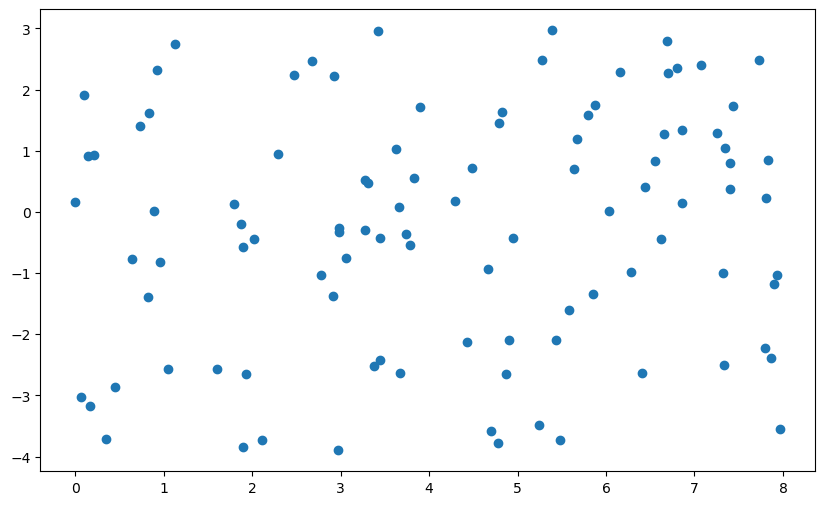

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(x1, x2)
plt.show()

In [4]:
C0 = np.where(g < -1)[0] # class 0 
C1 = np.where(g >= 1)[0] # class 1 

In [5]:
C0

array([ 2,  7, 10, 20, 22, 25, 26, 27, 29, 30, 35, 36, 37, 38, 41, 44, 45,
       46, 49, 51, 52, 59, 64, 65, 67, 68, 69, 71, 72, 77, 80, 87, 90, 91,
       92, 98])

In [6]:
C1

array([ 0,  1,  4,  5,  9, 11, 13, 15, 16, 17, 18, 19, 21, 23, 24, 28, 31,
       32, 42, 47, 48, 54, 55, 57, 60, 61, 70, 74, 75, 76, 79, 81, 82, 84,
       85, 86, 94, 95, 99])

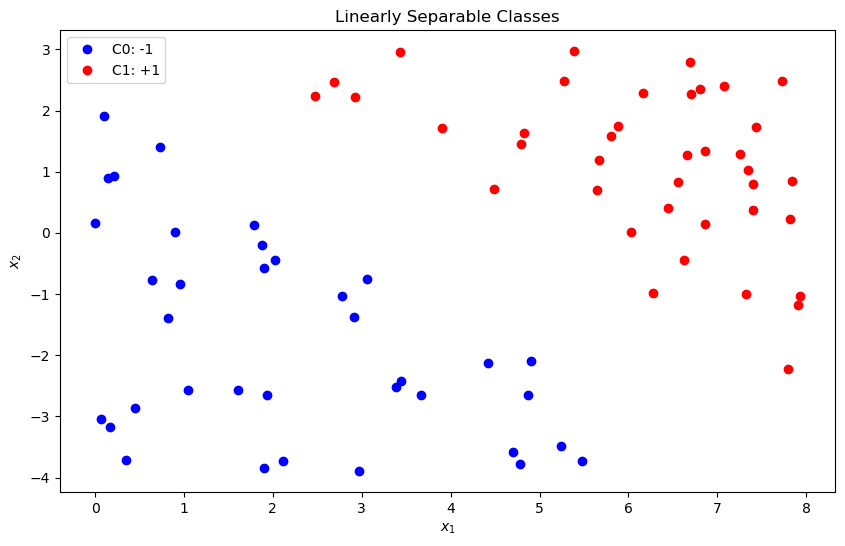

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(x1[C0], x2[C0], 'bo', label='C0: -1')
plt.plot(x1[C1], x2[C1], 'ro', label='C1: +1')
plt.title('Linearly Separable Classes')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [8]:
M0 = C0.shape[0]
M1 = C1.shape[0]

In [9]:
print("number of class 0 (-1) ->", M0)
print("number of class 1 ( 1) ->", M1)

number of class 0 (-1) -> 36
number of class 1 ( 1) -> 39


In [10]:
X0 = np.hstack([np.ones([M0, 1]), x1[C0], x2[C0]])
X1 = np.hstack([np.ones([M1, 1]), x1[C1], x2[C1]])

X = np.vstack([X0, X1])

y = np.vstack([-np.ones([M0, 1]), np.ones([M1, 1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

In [11]:
print("shape of X:", X.shape)
print("shape of y:", y.shape)

shape of X: (75, 3)
shape of y: (75, 1)


In [12]:
X[1, :]

matrix([[1.        , 0.21056152, 0.92600513]])

In [12]:
w = np.zeros([3, 1])   # random initialization
w = np.asmatrix(w)

n_iter = M0 + M1

for _ in range(100):
    for i in range(n_iter):
        if y[i, 0] != np.sign(X[i, :] * w)[0, 0]:
            w = w + y[i, 0] * X[i, :].T   # (3 X 1) == (1 X 1) * (3 X 1)

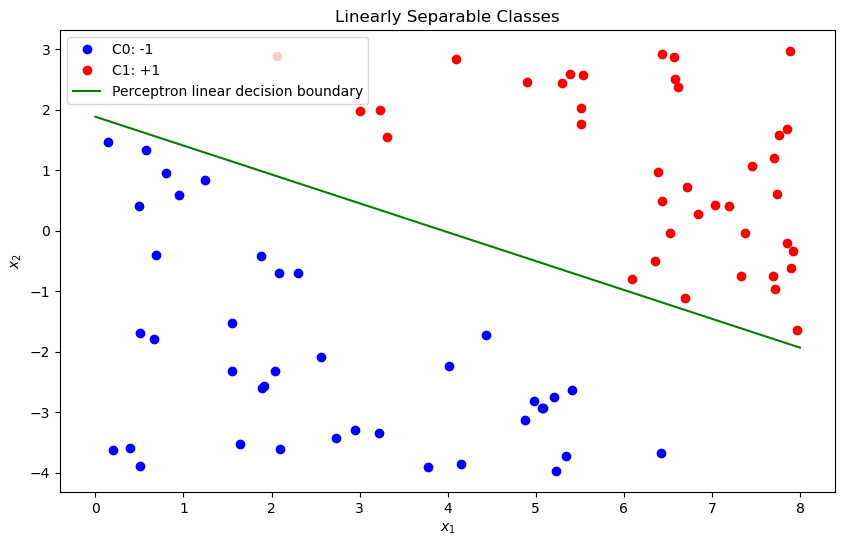

In [13]:
x1p = np.linspace(0, 8, 100).reshape(-1, 1)
x2p = -w[1, 0] / w[2, 0] * x1p - w[0, 0] / w[2, 0]

plt.figure(figsize=(10, 6))
plt.plot(x1[C0], x2[C0], 'bo', label='C0: -1')
plt.plot(x1[C1], x2[C1], 'ro', label='C1: +1')
plt.plot(x1p, x2p, c='green', label='Perceptron linear decision boundary')
plt.title('Linearly Separable Classes')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()